# 📘 Introduction to NumPy for the Everyday Scientist

NumPy is the *de-facto* standard for numerical work in Python.  
This notebook is a **practical crash-course** that you can keep as a reference.

Target audience:  
- You know basic Python (lists, loops, functions)  
- You want to manipulate numbers, images, spectra, time-series, …  
- You like copy-pasteable snippets with explanations

---
### 🚀 How to use this notebook
1. Run every code cell top-to-bottom (`Shift-Enter`).  
2. When you see 💡, try to modify the code and break it – that is how you learn.  
3. Keep it in your `~/docs` folder; it doubles as cheat-sheet.

## 0. Import convention – always the same

In [9]:
import numpy as np
import matplotlib.pyplot as plt  # optional, for quick visual checks

# Jupyter magic so plots appear inline
%matplotlib inline

## 1. Array creation – the 5 patterns you will actually use

In [14]:
# ---------- 1-D ----------
zeros = np.zeros(5)          # shape=5  → 1-D vector length 5
print(zeros)

[0. 0. 0. 0. 0.]


In [15]:
# ---------- 2-D ----------
# Shape tuple: (rows, columns)
ones = np.ones((3, 4))       # 3 rows, 4 columns  →  3×4 matrix
print(ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [16]:
# ---------- Constant fill ----------
# First argument is always the *shape* tuple, second is the *fill* value
full = np.full((2, 3), 7.3)  # 2 rows, 3 columns, every entry 7.3
print(full)

[[7.3 7.3 7.3]
 [7.3 7.3 7.3]]


In [19]:
# 1.2 Convert existing Python data
py_list = [1, 2, 3, 4]
arr     = np.array(py_list, dtype=float)  # dtype is optional but explicit
print(arr)

[1. 2. 3. 4.]


In [23]:
# 1.3 Ranges (like built-in range, but returns array)
rng = np.arange(0, 10, 2)     # start, stop (exclusive), step
print(rng)

[0 2 4 6 8]


In [28]:
# 1.4 Linearly spaced values (excellent for plotting axes)
x = np.linspace(0, 1, 2)      # 5 numbers between 0 and 1 *inclusive*
print(x)

[0. 1.]


In [30]:
# 1.5 Log-spaced (common in engineering / chemistry)
logx = np.logspace(-3, 3, 7)  # 10^-3 … 10^3
print(logx)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


## 2. Random numbers – reproducible science

In [56]:
def seed():
    """
    Sets a global random seed for NumPy to ensure reproducibility.

    This function makes any subsequent 'random' operations from NumPy
    produce the same sequence of numbers every time the code is run.
    This is critical for debugging, sharing notebooks, and getting
    consistent results in machine learning experiments.

    Args:
        seed_value (int): The seed value. Any integer will do. The same
                          integer will always produce the same sequence.
                          42 is a common, arbitrary choice.
    """
    np.random.seed(42)
seed()

In [42]:
# --- 1. Uniform Distribution ---
# Generate numbers from a uniform distribution over the interval [0, 1).
# "Uniform" means every number in this range has an equal chance of being picked.
# The interval [0, 1) means it includes 0 but goes up to (but not including) 1.
# The arguments (3, 3) specify the shape of the resulting array: 3 rows, 3 columns.
a = np.random.rand(3, 3)
print(a)

[[0.91694205 0.77629048 0.13050126]
 [0.56541997 0.44225228 0.79721107]
 [0.72423255 0.69040572 0.34054484]]


In [43]:
# Normal (μ=0, σ=1)
# --- 2. Standard Normal Distribution ---
# Generate 1000 numbers from a "standard normal" distribution.
# This is the famous "bell curve" where:
# - Most numbers are clustered around the mean (μ=0).
# - The spread is defined by the standard deviation (σ=1).
# This is useful for simulating natural phenomena like heights, weights, or measurement errors.
b = np.random.randn(1000)
b

array([-4.60017161e-01, -9.52558123e-01, -3.91723706e-02, -6.25550860e-02,
       -1.07853707e+00, -8.94937354e-01, -9.73231775e-01, -9.63715068e-01,
       -3.88097907e-01, -1.38898514e+00, -6.91374497e-01,  1.04513455e+00,
        8.23309452e-01, -1.04987924e+00,  9.58204917e-01, -1.96643927e+00,
        2.42914432e+00,  1.30031319e+00, -5.59731912e-01,  3.82426562e-01,
       -1.40091933e+00,  6.04427899e-02, -1.83663033e-01, -8.34763389e-01,
       -4.68557486e-01, -5.66987476e-01, -1.13173672e+00, -8.58147246e-01,
       -1.44184443e+00,  8.57330766e-01, -9.32112746e-01, -1.22202087e+00,
        8.41504680e-01,  3.69620354e-01,  8.04501056e-01,  9.16083224e-01,
        1.93745490e+00, -1.56039767e-01, -1.45760768e+00,  2.71037801e-01,
       -6.69004623e-01, -9.57505283e-01,  9.99251722e-02,  8.65752733e-01,
       -8.35994842e-01,  1.27438809e+00, -9.89613959e-01, -2.43903221e-01,
        3.86307882e-01, -3.87899209e-01, -1.77600234e+00,  9.27407492e-01,
       -6.23464340e-01,  

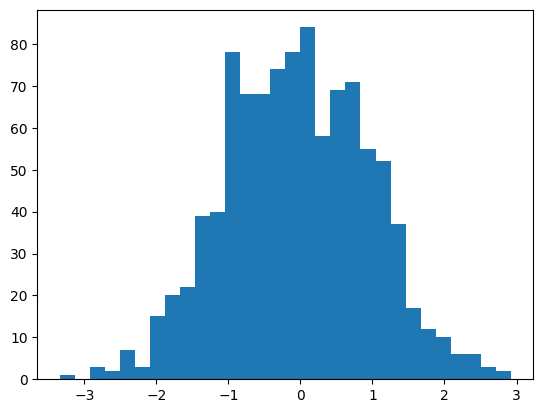

In [45]:
# If you were to plot this, you would see a classic bell curve.
# import matplotlib.pyplot as plt
plt.hist(b, bins=30)
plt.show()

In [39]:
# Random integers (half-open interval)
dice = np.random.randint(1, 7, size=10)  # 10 dice rolls
print(dice)

[2 6 2 2 5 5 5 4 2 3]


In [47]:
# --- 4. Choice with Probabilities ---
# Make a random choice from a list, but with a weighted probability.
# This is like a loaded die. 'A' is more likely to be chosen than 'B', which is more likely than 'C'.
# The 'p' argument must be a list of probabilities that sum to 1.0.
# Here, we generate 20 such choices.
choices = ['A', 'B', 'C']
probabilities = [0.5, 0.3, 0.2]  # 50% chance for A, 30% for B, 20% for C
weighted_choices = np.random.choice(choices, size=20, p=probabilities)
print("Weighted Choices:", weighted_choices)

Weighted Choices: ['C' 'A' 'A' 'B' 'B' 'C' 'C' 'A' 'A' 'A' 'B' 'C' 'A' 'A' 'A' 'C' 'A' 'A'
 'B' 'C']


## 3. Indexing & slicing – the power of views

In [6]:
arr2d = np.arange(1, 13).reshape(3, 4)  # 3×4 matrix

# Single element
arr2d[1, 2]      # row 1, column 2  → 7

# Entire rows / columns
row1 = arr2d[1, :]   # or arr2d[1]
col0 = arr2d[:, 0]

# Sub-matrix
sub = arr2d[0:2, 1:3]  # top-right 2×2 block

# ⚠️ Views vs copies
sub[:] = 99            # modifies original arr2d!
copy = arr2d[0:2, 1:3].copy()  # independent copy

## 4. Boolean indexing – filtering without loops

In [63]:
import numpy as np

def demonstrate_boolean_indexing():
    """
    Demonstrates the core concepts of NumPy boolean indexing.
    This includes creating a mask, applying it to filter data,
    combining masks, and modifying data in-place.
    """
    # --- 1. Our starting data ---
    # A simple NumPy array of floating-point numbers.
    data = np.array([3.5, 1.2, 9.8, 4.4, 2.1])
    print(f"Original data: {data}\n")

    # --- 2. Creating a Boolean Mask ---
    # We create a condition: data > 3.0.
    # NumPy evaluates this for each element and returns a new array
    # of True/False values. This is our "mask".
    # The mask itself is NOT the filtered data, it's the filter's blueprint.
    mask = data > 3.0
    print(f"Boolean mask (data > 3.0): {mask}")

    # --- 3. Applying the Mask to Filter Data ---
    # We pass the boolean mask as an index to the original data array.
    # NumPy returns a NEW array containing only the elements from `data`
    # where the corresponding value in `mask` was True.
    filtered = data[mask]
    print(f"Filtered data (where mask is True): {filtered}\n")

    # --- 4. The One-Line Shortcut ---
    # This is the more common, concise way to perform the operation.
    # The mask is created and applied in a single, readable line.
    filtered2 = data[data > 3.0]
    print(f"Filtered data (one-line version): {filtered2}\n")

    # --- 5. Combining Masks with AND (&) ---
    # To filter on multiple conditions, we combine masks.
    # Use '&' for 'AND' and '|' for 'OR'.
    # IMPORTANT: Each condition must be in parentheses () due to Python's operator precedence.
    mask2 = (data > 2.0) & (data < 5.0)
    print(f"Combined mask (data > 2.0 AND data < 5.0): {mask2}")

    # --- 6. Modifying Data In-Place ---
    # Instead of creating a new array, we can use a mask to change
    # values in the original array. Here, we replace values that meet
    # the condition with np.nan (Not a Number), a standard placeholder
    # for missing data.
    # NOTE: This modifies the `data` array directly!
    data[mask2] = np.nan
    print(f"Data after marking values with np.nan: {data}")

# To run the demonstration, you would call the function:
demonstrate_boolean_indexing()

Original data: [3.5 1.2 9.8 4.4 2.1]

Boolean mask (data > 3.0): [ True False  True  True False]
Filtered data (where mask is True): [3.5 9.8 4.4]

Filtered data (one-line version): [3.5 9.8 4.4]

Combined mask (data > 2.0 AND data < 5.0): [ True False False  True  True]
Data after marking values with np.nan: [nan 1.2 9.8 nan nan]


## 5. Universal functions (ufuncs) – fast element-wise maths

In [8]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)              # vectorised, C-speed, no Python loop

# Arithmetic
a = np.arange(1, 6)        # [1 2 3 4 5]
b = np.array([10, 20, 30, 40, 50])
print(a + b, a * b, a ** 2, 1/a)

[11 22 33 44 55] [ 10  40  90 160 250] [ 1  4  9 16 25] [1.         0.5        0.33333333 0.25       0.2       ]


## 6. Aggregations – one number to rule them all

In [ ]:
big = np.random.randn(1_000_000)

# Whole array
print(f"mean={big.mean():.3f}, std={big.std():.3f}")

# Along axes (rows / columns)
mat = big.reshape(10_000, 100)
row_means = mat.mean(axis=1)   # shape (10000,)
col_std   = mat.std(axis=0)    # shape (100,)

# ⚠️ NaN aware versions exist
safe_mean = np.nanmean(mat)    # ignores NaNs

## 7. Real-world mini-patterns

### 7.1 Physical units – keep track of metres vs millimetres

In [59]:
def mm_to_m(x):
    """Convert millimetres to metres."""
    return x * 1e-3

thickness_mm = np.array([1.2, 1.5, 2.0, 2.2])
thickness_m  = mm_to_m(thickness_mm)

# Compute volume for 1 m² sheet
volume = 1 * thickness_m  # m³
print(volume)

[0.0012 0.0015 0.002  0.0022]


### 7.2 Masked arrays – ignore bad sensors

In [ ]:
temp = np.array([23.1, 24.5, -999, 22.8, 25.0])  # -999 == broken sensor

masked = np.ma.masked_values(temp, -999)         # create masked array
print("Average (ignoring bad):", masked.mean())

### 7.3 Quick timing – how much faster is NumPy?

In [58]:
n = 1_000_000
a = np.random.rand(n)
b = np.random.rand(n)

# Python loop
%%timeit
py_sum = 0
for i in range(n):
    py_sum += a[i] * b[i]

# NumPy
%%timeit
np_sum = np.dot(a, b)  # or (a * b).sum()

UsageError: Line magic function `%%timeit` not found.


## 8. Saving & loading – because you will forget

In [ ]:
data = np.random.rand(100, 3)  # 100 measurements, 3 channels

# Binary (fast, small)
np.save('experiment.npy', data)
loaded = np.load('experiment.npy')

# Text (human readable)
np.savetxt('experiment.csv', data, delimiter=',', header='ch1,ch2,ch3')
loaded_txt = np.loadtxt('experiment.csv', delimiter=',', skiprows=1)

## 9. 📌 Cheat-sheet table (copy into your notes)

| Task | One-liner |
|---|---|
| Create 1-D range | `np.arange(start, stop, step)` |
| Create N×M zeros | `np.zeros((N, M))` |
| Random normal | `np.random.randn(N, M)` |
| Element-wise square | `arr**2` |
| Row means | `mat.mean(axis=1)` |
| Filter | `arr[arr > x]` |
| Save binary | `np.save('file.npy', arr)` |
| Load text | `np.loadtxt('file.csv', delimiter=',')` |

## 10. Where next?
- SciPy (`scipy.constants`, `scipy.optimize`, `scipy.stats`)  
- pandas (labelled tables)  
- Matplotlib / Seaborn (publication plots)  
- Install via conda-forge:  
  ```bash
  conda install -c conda-forge numpy scipy pandas matplotlib
  ```